In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [2]:
@model st_f_pnt begin
    @parameter begin
        d_Fr_chair=1825.3
        k_Fr_chair=1.3598e+05
        z_k_Fr_chair_ini=0.00036769
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "ST_F_PNT") 
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "F-nl7qfxtguJmQuIZ3vi-19", "parent" => "F-nl7qfxtguJmQuIZ3vi-15", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "pe2Z3EVLAYxKsAHty0Ld-10", "parent" => "pe2Z3EVLAYxKsAHty0Ld-5", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "pe2Z3EVLAYxKsAHty0Ld-9", "parent" => "pe2Z3EVLAYxKsAHty0Ld-5", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/3ZWy5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\">

st_f_pnt (generic function with 1 method)

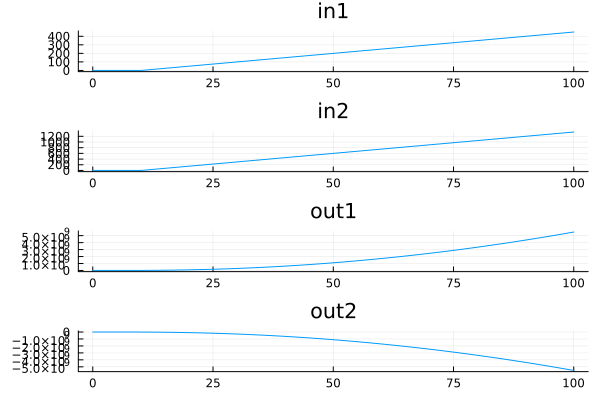

In [3]:
@model TestSt_f_pnt begin


    @block begin
        p = st_f_pnt()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.in1 
        ramp2.out => p.in2
    end
    @scope begin
        p.in1 => in1
        p.in2 => in2
        p.out1 => out1 
        p.out2 => out2
    end
end
m = @compile TestSt_f_pnt()
res = simulate(m, tspan=[0, 100])
plot(res)